In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import random
import math
import sys

## 1.读取数据集

In [302]:
data = pd.read_csv('data/train.csv',encoding='big5')
data.head(10)
data.replace("NR",0).head()

,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,豐原,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,豐原,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,豐原,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5


In [303]:
data.values

array([['2014/1/1', '豐原', 'AMB_TEMP', ..., '15', '15', '15'],
       ['2014/1/1', '豐原', 'CH4', ..., '1.8', '1.8', '1.8'],
       ['2014/1/1', '豐原', 'CO', ..., '0.35', '0.36', '0.32'],
       ...,
       ['2014/12/20', '豐原', 'WIND_DIREC', ..., '118', '100', '105'],
       ['2014/12/20', '豐原', 'WIND_SPEED', ..., '1.5', '2', '2'],
       ['2014/12/20', '豐原', 'WS_HR', ..., '1.6', '1.8', '2']],
      dtype=object)

## 2. 取出所有PM2.5数据

In [304]:
trainY = data[data['測項']=='PM2.5']

In [305]:
trainY.head()

,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
9,2014/1/1,豐原,PM2.5,26,39,36,35,31,28,25,...,36,45,42,49,45,44,41,30,24,13
27,2014/1/2,豐原,PM2.5,21,23,30,30,22,18,13,...,53,43,43,45,46,32,16,19,22,26
45,2014/1/3,豐原,PM2.5,19,25,27,20,16,14,15,...,32,36,34,45,40,41,23,29,23,37
63,2014/1/4,豐原,PM2.5,27,27,14,20,22,24,26,...,62,55,56,67,78,83,90,75,85,82
81,2014/1/5,豐原,PM2.5,80,80,76,81,75,66,70,...,64,73,57,57,53,70,70,60,68,66


In [306]:
pm2_5 = trainY.iloc[:,3:]

In [307]:
pm2_5.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
9,26,39,36,35,31,28,25,20,19,30,...,36,45,42,49,45,44,41,30,24,13
27,21,23,30,30,22,18,13,13,11,22,...,53,43,43,45,46,32,16,19,22,26
45,19,25,27,20,16,14,15,8,4,9,...,32,36,34,45,40,41,23,29,23,37
63,27,27,14,20,22,24,26,33,48,50,...,62,55,56,67,78,83,90,75,85,82
81,80,80,76,81,75,66,70,65,66,57,...,64,73,57,57,53,70,70,60,68,66


## 提取连续的十个小时观测数据，最后一小时作为label，前九个小时是feature。

In [308]:
tempxlist=[]
tempylist=[]
for i in range(15):
    tempx=pm2_5.iloc[:,i:i+9]        #使用前9小时数据作为feature
    tempx.columns=np.array(range(9))
    tempy=pm2_5.iloc[:,i+9]         #使用第10个小数数据作为lable
    tempy.columns=['1']
    tempxlist.append(tempx)
    tempylist.append(tempy)

In [309]:
xdata=pd.concat(tempxlist)     #feature数据
x=np.array(xdata,float)     
x     

array([[26., 39., 36., ..., 25., 20., 19.],
       [21., 23., 30., ..., 13., 13., 11.],
       [19., 25., 27., ..., 15.,  8.,  4.],
       ...,
       [31., 31., 36., ..., 39., 36., 24.],
       [21., 21., 19., ..., 11.,  0.,  7.],
       [ 1.,  7., 24., ..., 28., 17., 24.]])

In [310]:
x.shape


(3600, 9)

In [311]:
ydata=pd.concat(tempylist)      #lable数据
ydata.head()
y=(np.array(ydata,float))
y

array([30., 22.,  9., ..., 23.,  7., 29.])

In [312]:
x = np.concatenate((np.ones((x.shape[0],1)),x), axis=1)      #在feature基础上加入bias
x

array([[ 1., 26., 39., ..., 25., 20., 19.],
       [ 1., 21., 23., ..., 13., 13., 11.],
       [ 1., 19., 25., ..., 15.,  8.,  4.],
       ...,
       [ 1., 31., 31., ..., 39., 36., 24.],
       [ 1., 21., 21., ..., 11.,  0.,  7.],
       [ 1.,  1.,  7., ..., 28., 17., 24.]])

In [313]:
# 初始化一个参数矩阵
w=np.zeros((len(x[0])))
#初始化一个learning rate
lr=10
iteration=10000   #迭代10000次
s_grad=np.zeros(len(x[0]))
loss_ans = []
for i in range(iteration):
    tem=np.dot(x,w)     #&y^*&(预测值)
    loss=y-tem
    cost  = np.sum(loss**2)/len(x)
    loss_ans.append(cost) 
    grad=np.dot(x.transpose(),loss)*(-2)
    s_grad+=grad**2
    ada=np.sqrt(s_grad)
    w=w-lr*grad/ada
w    


array([ 2.15246702,  0.00728964, -0.04603067,  0.19941492, -0.20757788,
       -0.04384333,  0.46235285, -0.54329351,  0.01552538,  1.07716609])

In [314]:
testdata=pd.read_csv('data/test.csv',encoding='big5')

In [315]:
testdata = testdata.replace("NR",0)
testdata.head()

,id_0,AMB_TEMP,15,14,14.1,13,13.1,13.2,13.3,13.4,12
0,id_0,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
1,id_0,CO,0.36,0.35,0.34,0.33,0.33,0.34,0.34,0.37,0.42
2,id_0,NMHC,0.11,0.09,0.09,0.1,0.1,0.1,0.1,0.11,0.12
3,id_0,NO,0.6,0.4,0.3,0.3,0.3,0.7,0.8,0.8,0.9
4,id_0,NO2,9.3,7.1,6.1,5.7,5.5,5.3,5.5,7.1,7.5


In [316]:
#取出测试集
pm2_5_test=testdata[testdata['AMB_TEMP']=='PM2.5'].iloc[:,2:]

In [317]:
pm2_5_test.head()

,15,14,14.1,13,13.1,13.2,13.3,13.4,12
8,27,13,24,29,41,30,29,27,28
26,46,47,57,78,84,76,59,61,61
44,10,10,25,34,40,39,36,25,22
62,71,58,51,41,41,46,43,34,29
80,13,23,18,10,5,5,13,9,12


In [318]:
x_test=np.array(pm2_5_test,float)
x_test

array([[27., 13., 24., ..., 29., 27., 28.],
       [46., 47., 57., ..., 59., 61., 61.],
       [10., 10., 25., ..., 36., 25., 22.],
       ...,
       [16., 25., 12., ..., 11.,  3.,  0.],
       [29., 27., 23., ..., 35., 35., 26.],
       [12.,  8.,  7., ...,  0.,  0.,  0.]])

In [319]:
x_test_b=np.concatenate((np.ones((x_test.shape[0],1)),x_test),axis=1)

y_star=np.dot(x_test_b,w)

y_pre=pd.read_csv('data/sampleSubmission.csv')

y_pre.value=y_star

In [320]:
y_pre.head()

,id,value
0,id_0,27.414421
1,id_1,61.555764
2,id_2,20.498032
3,id_3,29.534434
4,id_4,10.797670


In [321]:
real=pd.read_csv('data/ans.csv')

In [322]:
erro=abs(y_pre.value-real.value).sum()/len(real.value)
erro

4.97442948413227

## 2) 提取连续的5个小时作为feature，最后的一个小时作为label

In [323]:
tempxlist1=[]
tempylist1=[]
for i in range(19):
    tempx1=pm2_5.iloc[:,i:i+5]        #使用前5小时数据作为feature
    tempx1.columns=np.array(range(5))
    tempy1=pm2_5.iloc[:,i+5]         #使用第6个小数数据作为lable
    tempy1.columns=['1']
    tempxlist1.append(tempx1)
    tempylist1.append(tempy1)
    
xdata1=pd.concat(tempxlist1)     #feature数据
x1=np.array(xdata1,float)     
x1     

array([[26., 39., 36., 35., 31.],
       [21., 23., 30., 30., 22.],
       [19., 25., 27., 20., 16.],
       ...,
       [31., 34., 39., 36., 24.],
       [25., 19., 11.,  0.,  7.],
       [49., 37., 28., 17., 24.]])

In [324]:
ydata1=pd.concat(tempylist1)      #lable数据
ydata1.head()
y1=(np.array(ydata1,float))
y1

array([28., 18., 14., ..., 23.,  7., 29.])

In [325]:
x1 = np.concatenate((np.ones((x1.shape[0],1)),x1), axis=1)      #在feature基础上加入bias
x1.shape

(4560, 6)

In [326]:
# 初始化一个参数矩阵
w1=np.zeros((len(x1[0])))
#初始化一个learning rate
lr1=10
iteration=10000   #迭代10000次
s_grad=np.zeros(len(x1[0]))
loss_ans1 = []
for i in range(iteration):
    tem=np.dot(x1,w1)     #&y^*&(预测值)
    loss1=y1-tem     
    cost  = np.sum(loss1**2)/len(x)
    loss_ans1.append(cost)
    grad=np.dot(x1.transpose(),loss1)*(-2)
    s_grad+=grad**2
    ada=np.sqrt(s_grad)
    w1=w1-lr1*grad/ada
w1   


array([ 2.05378908, -0.07525959,  0.39057703, -0.47617409,  0.0039637 ,
        1.07350025])

In [327]:

pm2_5test1 = pm2_5_test.iloc[:,3:]
x_test1 = np.array(pm2_5test1,float)
y_star1=np.dot(x_test1,w1)

In [328]:
y_pre.value=y_star1

In [329]:
erro1=abs(y_pre.value-real.value).sum()/len(real.value)

In [330]:
erro1

54.29362097271146

In [331]:
len(real.value)

240

## 结论
### 可以看出当feature个数设置为5个的时候误差大约在54左右，而feature个数为9个的时候误差在5左右

In [332]:
loss_ans


[876.1152777777778,
 5444878.576388889,
 867.5442552431199,
 143.78068046100813,
 137.91202206675527,
 132.63572774874913,
 127.80930679361711,
 123.38875199532274,
 119.33460520996772,
 115.61146659313476,
 112.18756699954645,
 109.03438592664008,
 106.12631012593089,
 103.44032853058775,
 100.95575961441547,
 98.65400771407651,
 96.51834521828546,
 94.53371785967562,
 92.68657064136274,
 90.9646921947431,
 89.35707560118249,
 87.85379392102703,
 86.44588886152083,
 85.12527118317753,
 83.8846315940938,
 82.71736101554448,
 81.61747922169477,
 80.57957096294061,
 79.59872877762547,
 78.67050178190516,
 77.79084980344003,
 76.95610229236571,
 76.16292150349922,
 75.40826949776151,
 74.6893785590318,
 74.00372466571736,
 73.3490036947782,
 72.72311007028372,
 72.12411759924132,
 71.5502622648175,
 70.99992677152343,
 70.47162665877323,
 69.96399781872432,
 69.47578527172595,
 69.005833068258,
 68.5530752001359,
 68.11652741616862,
 67.6952798485424,
 67.28849036610633,
 66.8953785795837

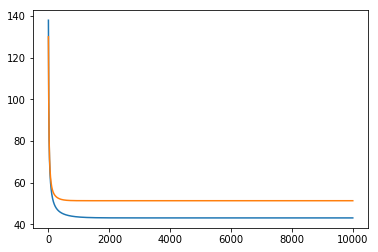

In [333]:
plt.plot(np.arange(len(loss_ans[4:])), loss_ans[4:])
plt.plot(np.arange(len(loss_ans1[4:])), loss_ans1[4:])
plt.show()

In [334]:
# 初始化一个参数矩阵
w=np.zeros((len(x[0])))
#初始化一个learning rate
lr=0.001
iteration=10000   #迭代10000次
s_grad=np.zeros(len(x[0]))
loss_ans2 = []
for i in range(iteration):
    tem=np.dot(x,w)     #&y^*&(预测值)
    loss=y-tem
    cost  = np.sum(loss**2)/len(x)
    loss_ans2.append(cost) 
    grad=np.dot(x.transpose(),loss)*(-2)
    s_grad+=grad**2
    ada=np.sqrt(s_grad)
    w=w-lr*grad/ada
w    



array([0.12480746, 0.10097291, 0.09840984, 0.09790095, 0.09948729,
       0.10309881, 0.10860045, 0.11486421, 0.12568768, 0.13436985])

In [335]:
# 初始化一个参数矩阵
w=np.zeros((len(x[0])))
#初始化一个learning rate
lr=0.01
iteration=10000   #迭代10000次
s_grad=np.zeros(len(x[0]))
loss_ans3 = []
for i in range(iteration):
    tem=np.dot(x,w)     #&y^*&(预测值)
    loss=y-tem
    cost  = np.sum(loss**2)/len(x)
    loss_ans3.append(cost) 
    grad=np.dot(x.transpose(),loss)*(-2)
    s_grad+=grad**2
    ada=np.sqrt(s_grad)
    w=w-lr*grad/ada
w  

array([ 0.85718784,  0.05254141,  0.00151083,  0.01106724,  0.00403472,
        0.03399255,  0.02294609, -0.18736755,  0.26100136,  0.76310517])

In [336]:
# 初始化一个参数矩阵
w=np.zeros((len(x[0])))
#初始化一个learning rate
lr=0.1
iteration=10000   #迭代10000次
s_grad=np.zeros(len(x[0]))
loss_ans4 = []
for i in range(iteration):
    tem=np.dot(x,w)     #&y^*&(预测值)
    loss=y-tem
    cost  = np.sum(loss**2)/len(x)
    loss_ans4.append(cost) 
    grad=np.dot(x.transpose(),loss)*(-2)
    s_grad+=grad**2
    ada=np.sqrt(s_grad)
    w=w-lr*grad/ada
w  

array([ 2.15246821,  0.0072849 , -0.04601922,  0.19940645, -0.20758256,
       -0.04382791,  0.46234134, -0.54329584,  0.01553632,  1.07715989])

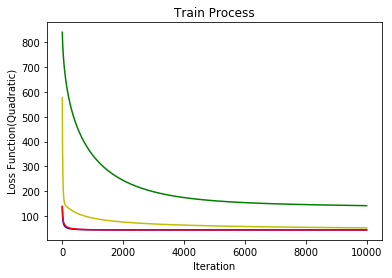

In [338]:
plt.plot(np.arange(len(loss_ans[4:])), loss_ans[4:],'b')
plt.plot(np.arange(len(loss_ans2[4:])), loss_ans2[4:],'g')
plt.plot(np.arange(len(loss_ans3[4:])), loss_ans3[4:],'y')
plt.plot(np.arange(len(loss_ans4[4:])), loss_ans4[4:],'r')
plt.title('Train Process')
plt.xlabel('Iteration')
plt.ylabel('Loss Function(Quadratic)')
plt.show()


## 结论：
### 可以看出随着$\lambda$ 的增加loss下降的越来越快